In [1]:
# !pip install matplotlib pandas networkx version_information
%load_ext version_information
%version_information networkx, cypher, pandas, matplotlib

Software versions
Python 3.6.2 64bit [GCC 4.2.1 Compatible Apple LLVM 8.0.0 (clang-800.0.38)]
IPython 6.2.1
OS Darwin 17.4.0 x86_64 i386 64bit
networkx 2.1
cypher The 'cypher' distribution was not found and is required by the application
pandas 0.22.0
matplotlib 2.2.2
Sun Mar 25 23:32:12 2018 PDT

In [2]:
%load_ext cypher

In [3]:
%config CypherMagic

CypherMagic options
-----------------
CypherMagic.auto_html=<Bool>
    Current: False
    Return a D3 representation of the graph instead of regular result sets
CypherMagic.auto_limit=<Int>
    Current: 0
    Automatically limit the size of the returned result sets
CypherMagic.auto_networkx=<Bool>
    Current: False
    Return Networkx MultiDiGraph instead of regular result sets
CypherMagic.auto_pandas=<Bool>
    Current: False
    Return Pandas DataFrame instead of regular result sets
CypherMagic.data_contents=<Bool>
    Current: True
    Bring extra data to render the results as a graph
CypherMagic.display_limit=<Int>
    Current: 0
    Automatically limit the number of rows displayed (full result set is still
    stored)
CypherMagic.feedback=<Bool>
    Current: True
    Print number of rows affected
CypherMagic.rest=<Bool>
    Current: False
    Return full REST representations of objects inside the result sets
CypherMagic.short_errors=<Bool>
    Current: True
    Don't display the 

In [4]:
%cypher match (n)-[r]-() delete n, r

6 nodes deleted.
6 relationship deleted.


[]

In [5]:
%%cypher
create
    // Nodes
    (Neo:Crew {name:'Neo'}),
    (Morpheus:Crew {name: 'Morpheus'}),
    (Trinity:Crew {name: 'Trinity'}),
    (Cypher:Crew:Matrix {name: 'Cypher'}),
    (Smith:Matrix {name: 'Agent Smith'}),
    (Architect:Matrix {name:'The Architect'}),
    // Relationships
    (Neo)-[:KNOWS]->(Morpheus),
    (Neo)-[:LOVES]->(Trinity),
    (Morpheus)-[:KNOWS]->(Trinity),
    (Morpheus)-[:KNOWS]->(Cypher),
    (Cypher)-[:KNOWS]->(Smith),
    (Smith)-[:CODED_BY]->(Architect);

6 nodes created.
6 properties set.
6 relationships created.
7 labels added.


[]

In [6]:
%cypher match (n)-[r]-() return n, count(r) as degree order by degree desc

6 rows affected.


n,degree
{'name': 'Morpheus'},3
{'name': 'Neo'},2
{'name': 'Cypher'},2
{'name': 'Trinity'},2
{'name': 'Agent Smith'},2
{'name': 'The Architect'},1


In [7]:
results = %cypher match (n)-[r]-() return n.name as name, type(r) as rel, count(r) as degree order by degree desc

9 rows affected.


In [8]:
%matplotlib inline

In [9]:
results.get_dataframe()

,name,rel,degree
0,Morpheus,KNOWS,3
1,Cypher,KNOWS,2
2,The Architect,CODED_BY,1
3,Agent Smith,CODED_BY,1
4,Agent Smith,KNOWS,1
5,Neo,LOVES,1
6,Trinity,LOVES,1
7,Neo,KNOWS,1
8,Trinity,KNOWS,1


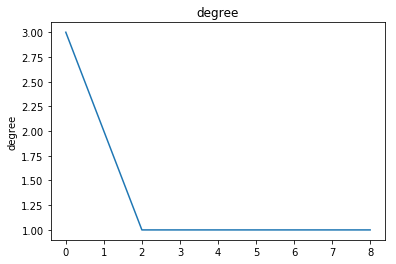

In [10]:
results.plot()

<BarContainer object of 9 artists>

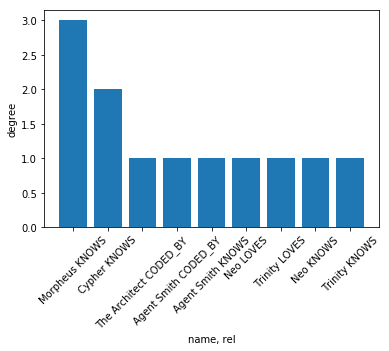

In [11]:
results.bar()

([<matplotlib.patches.Wedge at 0x10aa0e588>,
 [Text(0.777817,0.777817,'Morpheus KNOWS'),
  Text(-0.55,0.952628,'Cypher KNOWS'),
  Text(-1.06252,0.284701,'The Architect CODED_BY'),
  Text(-1.06252,-0.284701,'Agent Smith CODED_BY'),
  Text(-0.777817,-0.777818,'Agent Smith KNOWS'),
  Text(-0.284701,-1.06252,'Neo LOVES'),
  Text(0.284701,-1.06252,'Trinity LOVES'),
  Text(0.777818,-0.777817,'Neo KNOWS'),
  Text(1.06252,-0.284701,'Trinity KNOWS')])

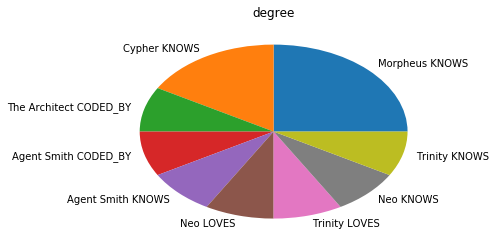

In [12]:
results.pie()

In [13]:
for i in range(1, 5):
    %cypher match (n) return n, n.name limit {i}

1 rows affected.
2 rows affected.
3 rows affected.
4 rows affected.


(<networkx.classes.multidigraph.MultiDiGraph at 0x10a8ea5f8>,
 None)

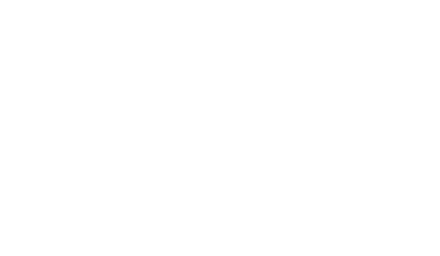

In [14]:
results.draw()

In [15]:
results.graph

In [16]:
results.dataframe

,name,rel,degree
0,Morpheus,KNOWS,3
1,Cypher,KNOWS,2
2,The Architect,CODED_BY,1
3,Agent Smith,CODED_BY,1
4,Agent Smith,KNOWS,1
5,Neo,LOVES,1
6,Trinity,LOVES,1
7,Neo,KNOWS,1
8,Trinity,KNOWS,1


In [17]:
print(results.csv())

name,rel,degree
                 Morpheus,KNOWS,3
                                   Cypher,KNOWS,2
                                                   The Architect,CODED_BY,1
                                                                             Agent Smith,CODED_BY,1
                                                                                                     Agent Smith,KNOWS,1
                                                                                                                          Neo,LOVES,1
                                                                                                                                       Trinity,LOVES,1
                                                                                                                                                        Neo,KNOWS,1
                                                                                                                                                          

In [18]:
from cypher import run
run("match (n)-[r]-() return n.name as name, type(r) as rel, count(r) as degree order by degree desc")

9 rows affected.


name,rel,degree
Morpheus,KNOWS,3
Cypher,KNOWS,2
The Architect,CODED_BY,1
Agent Smith,CODED_BY,1
Agent Smith,KNOWS,1
Neo,LOVES,1
Trinity,LOVES,1
Neo,KNOWS,1
Trinity,KNOWS,1


In [19]:
results.get_graph()